# Sales Python Project

First we import all libraries that are going to be used during the project. Then we open un the Sales file and read the first 10 lines to verify that the read was succesfull

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sb

sales = pd.read_csv('sales.csv')

sales.head(10)

,Order ID,Order Date,Order Year,Order Quarter,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2018-152156,08/11/2018,2018,3,11/11/2018,Second Class,CG-12520,Claire Gute,Consumer,United States,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,CA-2018-152156,08/11/2018,2018,3,11/11/2018,Second Class,CG-12520,Claire Gute,Consumer,United States,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,CA-2018-138688,12/06/2018,2018,4,16/06/2018,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,US-2017-108966,11/10/2017,2017,4,18/10/2017,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,...,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,US-2017-108966,11/10/2017,2017,4,18/10/2017,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,...,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
5,CA-2016-115812,09/06/2016,2016,3,14/06/2016,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,...,90032.0,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
6,CA-2016-115812,09/06/2016,2016,3,14/06/2016,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,...,90032.0,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.2800,4,0.00,1.9656
7,CA-2016-115812,09/06/2016,2016,3,14/06/2016,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,...,90032.0,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.1520,6,0.20,90.7152
8,CA-2016-115812,09/06/2016,2016,3,14/06/2016,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,...,90032.0,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.5040,3,0.20,5.7825
9,CA-2016-115812,09/06/2016,2016,3,14/06/2016,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,...,90032.0,West,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.9000,5,0.00,34.4700


We use 'info' to see all columns and the data type of each one.

In [2]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Order Date     9994 non-null   object 
 2   Order Year     9994 non-null   int64  
 3   Order Quarter  9994 non-null   int64  
 4   Ship Date      9994 non-null   object 
 5   Ship Mode      9994 non-null   object 
 6   Customer ID    9994 non-null   object 
 7   Customer Name  9994 non-null   object 
 8   Segment        9994 non-null   object 
 9   Country        9994 non-null   object 
 10  City           9994 non-null   object 
 11  State          9994 non-null   object 
 12  Postal Code    9983 non-null   float64
 13  Region         9994 non-null   object 
 14  Product ID     9994 non-null   object 
 15  Category       9994 non-null   object 
 16  Sub-Category   9994 non-null   object 
 17  Product Name   9994 non-null   object 
 18  Sales   

As seen the column names have space in the names and the data types for dates are not the correct one. So we iterate each column to remove the unwanted space. Then we simply assigned the correct data type to the dates columns. We used 'info' again to verify the changes.

In [3]:
col_names = sales.columns
new_names = []

for col in col_names:
    new_names.append(col.replace(" ", "_"))
sales.columns = new_names

sales['Order_Date']=pd.to_datetime(sales['Order_Date'])
sales['Ship_Date']=pd.to_datetime(sales['Ship_Date'])
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order_ID       9994 non-null   object        
 1   Order_Date     9994 non-null   datetime64[ns]
 2   Order_Year     9994 non-null   int64         
 3   Order_Quarter  9994 non-null   int64         
 4   Ship_Date      9994 non-null   datetime64[ns]
 5   Ship_Mode      9994 non-null   object        
 6   Customer_ID    9994 non-null   object        
 7   Customer_Name  9994 non-null   object        
 8   Segment        9994 non-null   object        
 9   Country        9994 non-null   object        
 10  City           9994 non-null   object        
 11  State          9994 non-null   object        
 12  Postal_Code    9983 non-null   float64       
 13  Region         9994 non-null   object        
 14  Product_ID     9994 non-null   object        
 15  Category       9994 n

### Focusing on Customers

To measure customer related topics it's necessary to create a new data frame grouping important info from the data set. The topics we want to look to is Customer Retention, Active Customer Volume, Buying Frequency. So from the original data set we kept relevant info as Order Date and Order Year. To do the grouping we based it on unique Customer Id.

In [5]:
users = pd.unique(sales['Customer_ID'])
ed, rd, dd, yd, ym, no, ni, adtb = [], [], [], [], [], [], [], []

for user in users:
    temp = sales.loc[sales['Customer_ID'] == user]
    avg_Sales = temp.Sales.mean()
    ed.append(temp.Order_Date.min())
    rd.append(temp.Order_Date.max())
    yd.append(temp.Order_Year.max())
    ym.append(temp.Order_Year.min())
    ni.append(len(temp))
    no.append(len(pd.unique(temp['Order_ID'])))
    
for i in range(len(ed)):
    tmp = pd.to_datetime(rd[i])-pd.to_datetime(ed[i])
    dd.append(tmp)
    tmp_diff = tmp.days/no[i]
    adtb.append(tmp_diff)
    
user_data = pd.DataFrame(
    {'User_ID':users, 
      'First_Order':ed, 
      'Last_Order':rd, 
      'Date_Difference':dd,
      'Year_Last_Order':yd,
      'Year_First_Order':ym,
      'Number_Orders':no,
      'Number_Items':ni,
      'Avg_dbp':adtb})
user_data.head(20)

,User_ID,First_Order,Last_Order,Date_Difference,Year_Last_Order,Year_First_Order,Number_Orders,Number_Items,Avg_dbp
0,CG-12520,2017-10-15,2019-01-26,468 days,2019,2017,3,5,156.000000
1,DV-13045,2018-09-23,2019-11-12,415 days,2019,2018,5,9,83.000000
2,SO-20335,2017-04-12,2019-09-09,880 days,2019,2017,6,15,146.666667
3,BH-11710,2016-09-06,2019-07-12,1039 days,2019,2016,8,24,129.875000
4,AA-10480,2016-04-05,2019-04-15,1105 days,2019,2016,4,12,276.250000
5,IM-15070,2016-12-19,2018-06-23,551 days,2018,2016,7,21,78.714286
6,HP-14815,2016-06-05,2019-11-30,1273 days,2019,2016,7,10,181.857143
7,PK-19075,2016-11-11,2019-12-21,1135 days,2019,2016,12,25,94.583333
8,AG-10270,2016-05-13,2019-03-27,1048 days,2019,2016,5,14,209.600000
9,ZD-21925,2016-08-27,2019-11-06,1166 days,2019,2016,5,9,233.200000


In [23]:
def values_on_bars(chart):
    for p in chart.patches:
        if p.get_height() != 0:
            chart.annotate(format(p.get_height(), '.2f'), 
                           (p.get_x() + p.get_width() / 2., 
                           p.get_height()), 
                           ha = 'center', 
                           va = 'center',
                           xytext = (0, 10), 
                           textcoords = 'offset points')

The first thing to look at is the active custumer volume. With this we can tell how many customers are still active and also we can tell how many customers stoped buying each year.

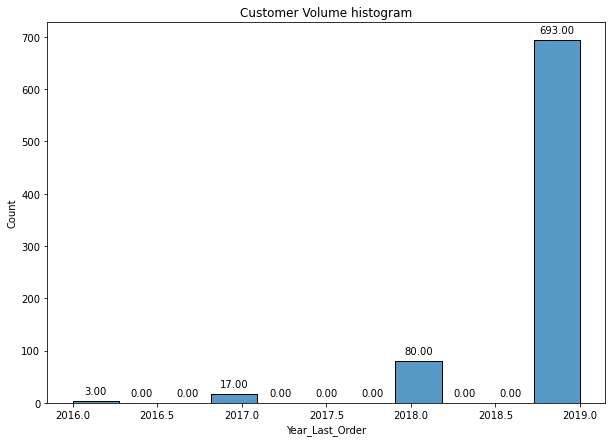

In [16]:
plt.figure( figsize = (10, 7) )
customer_vol = sb.histplot(user_data, x="Year_Last_Order")
customer_vol.set_title('Customer Volume histogram')
values_on_bars(customer_vol)

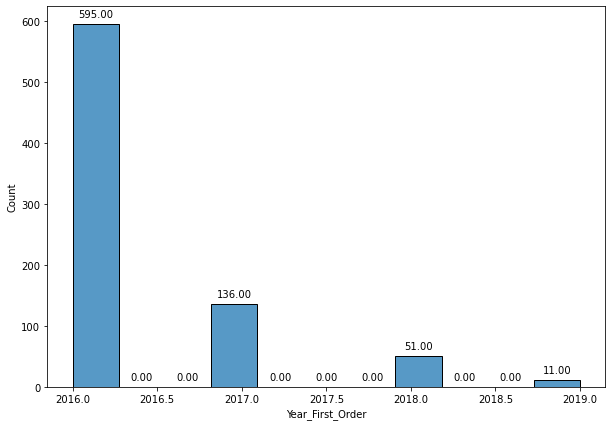

In [17]:
plt.figure( figsize = (10, 7) )
values_on_bars(sb.histplot(user_data, x="Year_First_Order"))

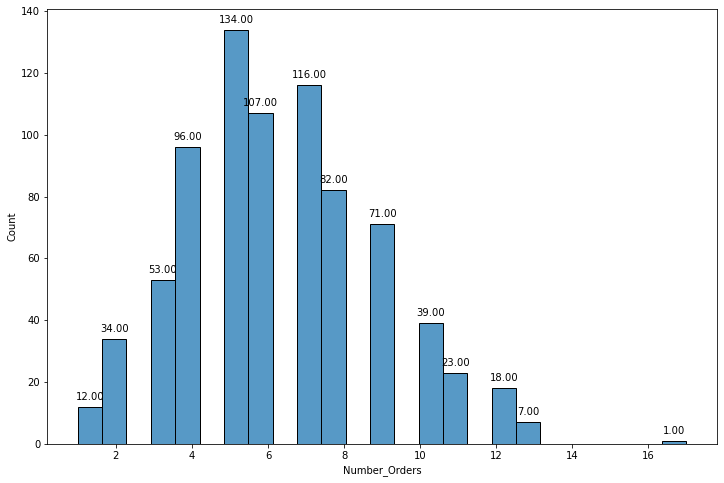

In [24]:
plt.figure( figsize = (12, 8) )
values_on_bars(sb.histplot(user_data, x="Number_Orders"))
#number of items per customer

### Focusing on Orders
Next topic to cover are all the data related to Orders. We wanted to know more about orders, like total sales, total profits, items per order and we wanted to see what we can find from the shiping date. To achive this we did the same procedure and created a new data frame with all the important information. The new data frame contains the following columns: order_id, total_sales, total_profit, items, order_date, ship_date, date_difference.

In [12]:
orders = pd.unique(sales['Order_ID'])
ots, otp, ni, sd, od, dd2 = [],[],[],[],[], []

for order in orders:
    temp = sales.loc[sales['Order_ID']==order]
    ots.append(temp.Sales.sum())
    otp.append(temp.Profit.sum())
    ni.append(len(temp))
    od.append(temp.Order_Date.min())
    sd.append(temp.Ship_Date.min())
    
for i in range(len(sd)):
    tmp = pd.to_datetime(sd[i])-pd.to_datetime(od[i])
    dd2.append(tmp.days)
    

order_data = pd.DataFrame({
    'order_id':orders,
    'total_sales':ots,
    'total_profit':otp,
    'items':ni,
    'Order_Date':od,
    'Ship_Date':sd,
    'Date_Difference':dd2
    })

order_data.head(20)

,id,total_sales,total_profit,items,Order_Date,Ship_Date,Date_Difference
0,CA-2018-152156,993.9000,261.4956,2,2018-08-11,2018-11-11,92
1,CA-2018-138688,14.6200,6.8714,1,2018-12-06,2018-06-16,-173
2,US-2017-108966,979.9455,-380.5146,2,2017-11-10,2017-10-18,-23
3,CA-2016-115812,3714.3040,300.7687,7,2016-09-06,2016-06-14,-84
4,CA-2019-114412,15.5520,5.4432,1,2019-04-15,2019-04-20,5
5,CA-2018-161389,407.9760,132.5922,1,2018-05-12,2018-10-12,153
6,US-2017-118983,71.3540,-127.6740,2,2017-11-22,2017-11-26,4
7,CA-2016-105893,665.8800,13.3176,1,2016-11-11,2016-11-18,7
8,CA-2016-167164,55.5000,9.9900,1,2016-05-13,2016-05-15,2
9,CA-2016-143336,244.7600,25.8774,3,2016-08-27,2016-01-09,-231


Text(0, 0.5, 'Count')

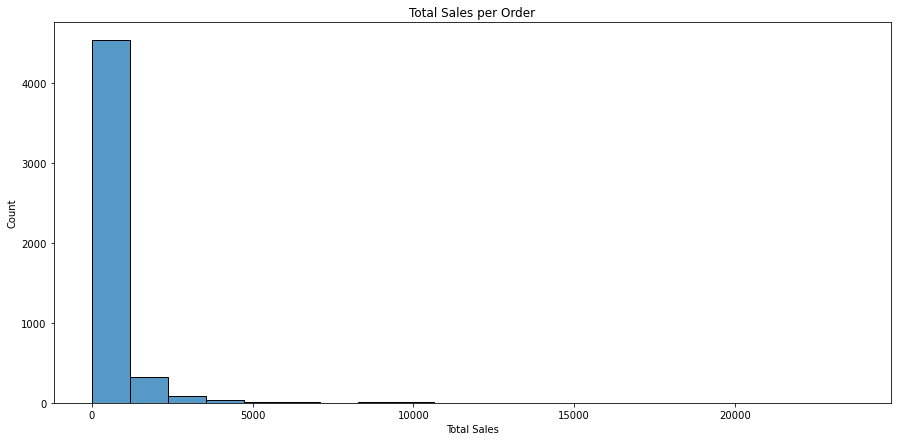

In [32]:
plt.figure( figsize = (15, 7) )
g_ts = sb.histplot(order_data, x=order_data['total_sales'], bins=20)
g_ts.set_title('Total Sales per Order')
g_ts.set_xlabel('Total Sales')
g_ts.set_ylabel('Count')

Text(0, 0.5, 'Count')

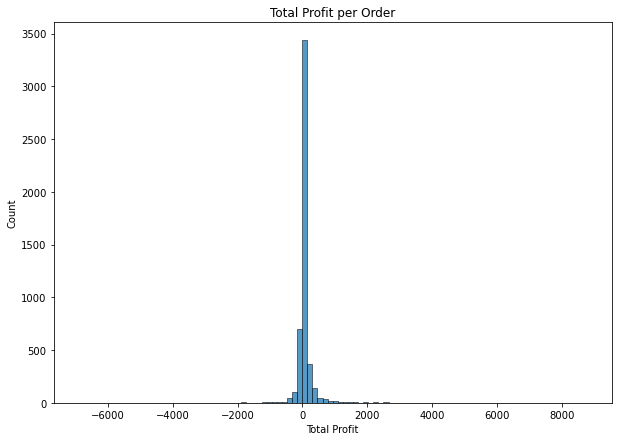

In [46]:
plt.figure( figsize = (10, 7) )
g_tp = sb.histplot(order_data, x=order_data['total_profit'], bins = 100)
g_tp.set_title('Total Profit per Order')
g_tp.set_xlabel('Total Profit')
g_tp.set_ylabel('Count')

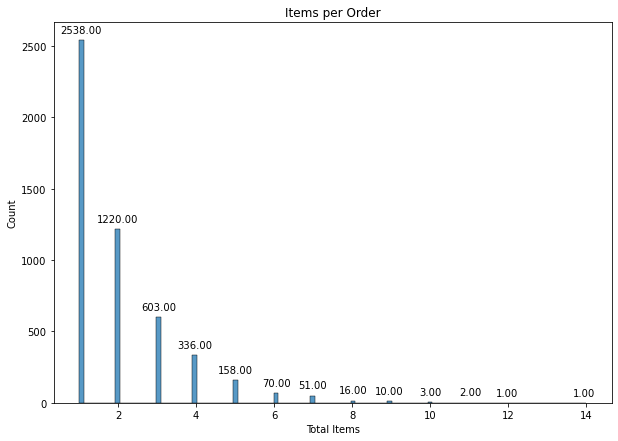

In [44]:
plt.figure( figsize = (10, 7) )
g_items = sb.histplot(order_data, x=order_data['items'])
g_items.set_title('Items per Order')
g_items.set_xlabel('Total Items')
g_items.set_ylabel('Count')
values_on_bars(g_items)

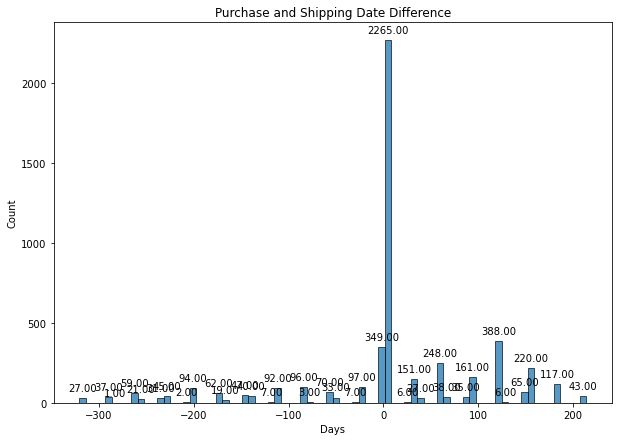

In [48]:
plt.figure( figsize = (10, 7) )
g_s=sb.histplot(order_data, x=order_data['Date_Difference'])
g_s.set_title('Purchase and Shipping Date Difference')
g_s.set_xlabel('Days')
g_s.set_ylabel('Count')
values_on_bars(g_s)